In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_SBUX.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,76.67,76.700,76.08,76.16,7458265,2019-04-15,74.8091,2019-04-15,74.2695,2019-04-15,85.3529
1,1,2019-04-12,76.10,76.950,76.07,76.65,5194754,2019-04-12,74.6013,2019-04-12,81.1156,2019-04-12,93.8578
2,2,2019-04-11,75.75,76.070,75.65,75.87,6042641,2019-04-11,74.2861,2019-04-11,78.1366,2019-04-11,93.9198
3,3,2019-04-10,75.21,75.815,75.21,75.48,6066274,2019-04-10,74.0424,2019-04-10,76.4088,2019-04-10,94.0257
4,4,2019-04-09,74.87,75.230,74.80,75.12,4905834,2019-04-09,73.8212,2019-04-09,74.6947,2019-04-09,94.1295


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    76.16
1    76.65
2    75.87
3    75.48
4    75.12
Name: close, dtype: float64

In [7]:
len(close)

5341

In [8]:
train = close.loc[:len(close) - int(len(close)*0.15) -1]
test = close.loc[len(close) - int(len(close)*0.15):]
print(train.tail())
print(test.head())

4535    41.75
4536    43.00
4537    42.44
4538    41.94
4539    41.19
Name: close, dtype: float64
4540    40.69
4541    41.63
4542    40.88
4543    40.06
4544    40.94
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

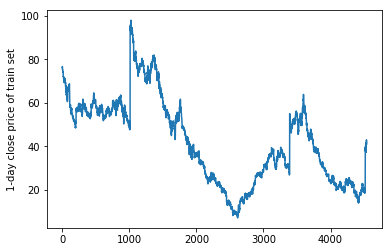

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

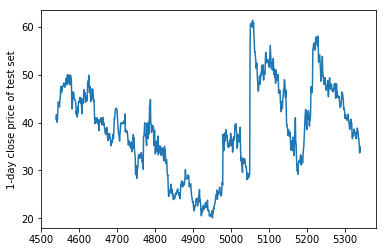

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

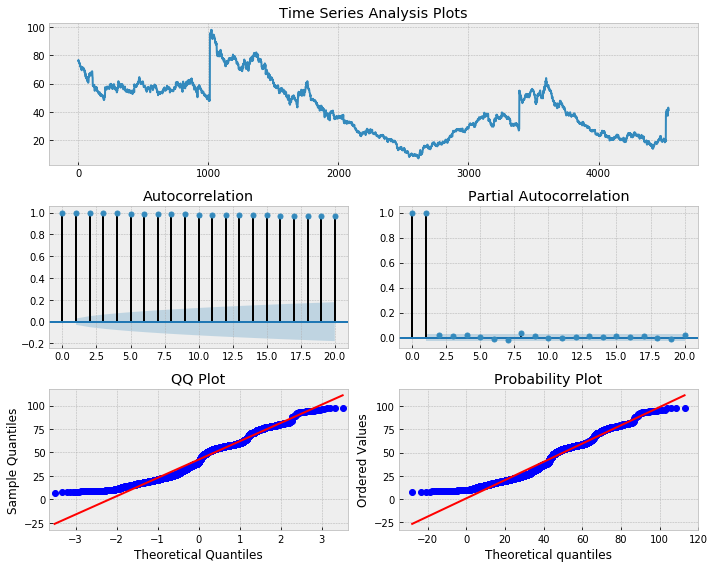

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-2.2927750616333666,
 0.1743087471698343,
 0,
 4539,
 {'1%': -3.431791507386407,
  '5%': -2.862176976150702,
  '10%': -2.5671090656221147},
 13692.465954360987)

Text(0,0.5,'Difference in 1-day close price')

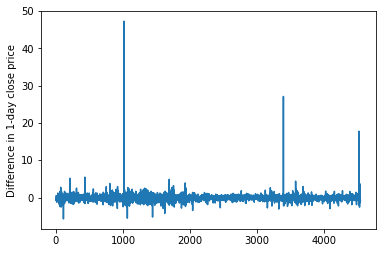

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-68.82875048641822,
 0.0,
 0,
 4538,
 {'1%': -3.4317918252189368,
  '5%': -2.8621771165611385,
  '10%': -2.567109140369139},
 13693.054080868937)

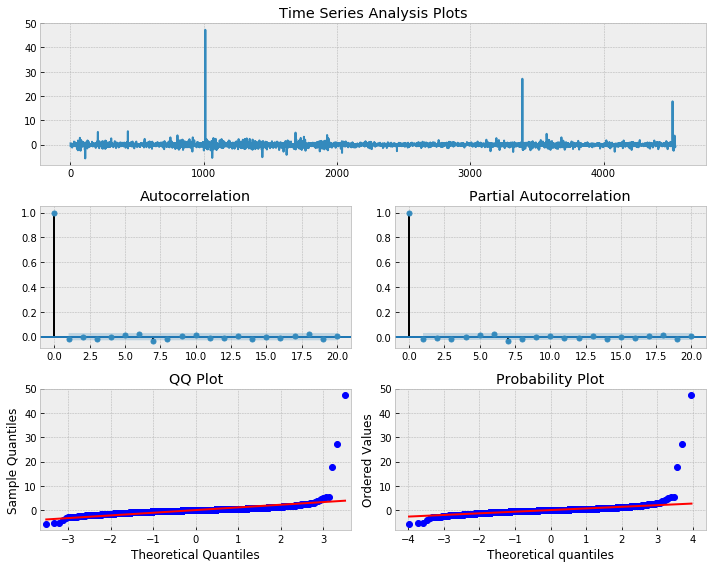

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6868.924
Method:                           css   S.D. of innovations              1.099
Date:                Wed, 17 Apr 2019   AIC                          13741.848
Time:                        16:16:27   BIC                          13754.689
Sample:                             1   HQIC                         13746.370
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.016     -0.472      0.637      -0.040       0.024
==============================================================================
"""

In [17]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6867.851
Method:                       css-mle   S.D. of innovations              1.099
Date:                Wed, 17 Apr 2019   AIC                          13741.701
Time:                        16:16:48   BIC                          13760.963
Sample:                             1   HQIC                         13748.485
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077      0.016     -0.483      0.629      -0.039       0.024
ar.L1.D.close    -0.0217      0.015     -1.465      0.143      -0.051       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -45.9948           +0.0000j           45.9948            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6867.837
Method:                       css-mle   S.D. of innovations              1.099
Date:                Wed, 17 Apr 2019   AIC                          13741.673
Time:                        16:17:05   BIC                          13760.935
Sample:                             1   HQIC                         13748.457
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077      0.016     -0.483      0.629      -0.039       0.024
ma.L1.D.close    -0.0220      0.015     -1.474      0.140      -0.051       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           45.3791           +0.0000j           45.3791            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
arima111 = smt.ARIMA(train, (1,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima111_fit = arima111.fit() #change model name*2
arima111_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6867.427
Method:                       css-mle   S.D. of innovations              1.099
Date:                Wed, 17 Apr 2019   AIC                          13742.853
Time:                        16:17:35   BIC                          13768.535
Sample:                             1   HQIC                         13751.899
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077      0.015     -0.496      0.620      -0.038       0.023
ar.L1.D.close     0.5763      0.588      0.980      0.327      -0.576       1.728
ma.L1.D.close    -0.5973      0.577     -1.035      0.301      -1.728       0.534
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7352           +0.0000j            1.7352            0.0000
MA.1            1.6742           +0.0000j            1.6742            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

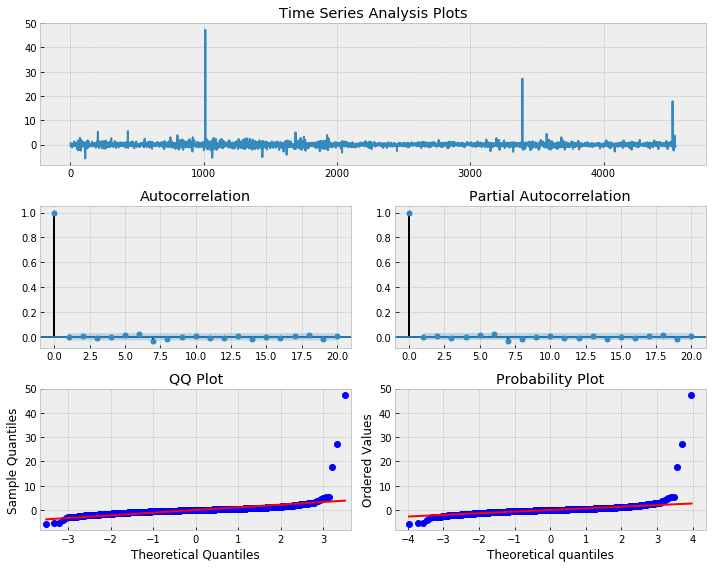

In [25]:
tsplot(arima111_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [24]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima111_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([2.43307013]), array([0.78653936]))

### Forecasting

In [26]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima111_fit.forecast(steps=num_steps)   #change model name

In [27]:
arima111_fit.forecast(steps=num_steps)   #change model name

(array([41.1979617 , 41.19929017, 41.1967959 , 41.19209857, 41.18613161]),
 array([1.09860772, 1.53744601, 1.86872421, 2.1457649 , 2.38897331]),
 array([[39.04473013, 43.35119327],
        [38.18595136, 44.21262898],
        [37.53416375, 44.85942805],
        [36.98647664, 45.3977205 ],
        [36.50382995, 45.86843326]]))

In [28]:
arima111_fit.forecast(steps=num_steps)[0][4]    #change model name

41.18613160785534

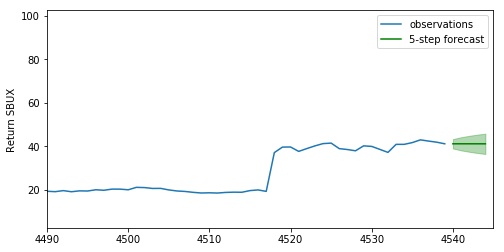

In [29]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return SBUX')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [38]:
pred = []
for i in range(int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) - int(len(close)*0.15) -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [31]:
#(1,1,1)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.8631707660803726
MAE = 2.221055108021008
RMSE = 3.705903433672617
Scaled MAE = 0.053752543756558746
Scaled RMSE = 0.08968788561647184


In [37]:
#(0,1,1)   final one
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.8632539623017955
MAE = 2.223025364018389
RMSE = 3.7047766129101642
Scaled MAE = 0.053800226621935836
Scaled RMSE = 0.08966061502686747


In [35]:
#(0,1,0)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.8632517749812436
MAE = 2.223261850323428
RMSE = 3.704806242659433
Scaled MAE = 0.053805949911021965
Scaled RMSE = 0.08966133210695626


In [39]:
#(1,1,0)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.8632578606345784
MAE = 2.223041178442435
RMSE = 3.7047238049630433
Scaled MAE = 0.05380060935243065
Scaled RMSE = 0.0896593370029778
